# **Airlines Passanger Satisfaction**

By Muhammad Rifky Ronanda Suryatama

# Project Background

Dalam industri aviasi yang sangat kompetitif, kepuasan pelanggan merupakan elemen krusial. Untuk itu, pemahaman mendalam mengenai faktor-faktor yang membentuk pengalaman penumpang menjadi esensial bagi maskapai dalam upaya meningkatkan kualitas layanan dan menjaga retensi pelanggan. Dataset ini menyajikan informasi komprehensif yang mencakup demografi penumpang, spesifikasi perjalanan, serta evaluasi terhadap berbagai atribut layanan seperti konektivitas dalam penerbangan, proses boarding daring, kenyamanan kursi, dan kepatuhan terhadap jadwal.

# Objective

* Melakukan Exploratory Data Analysis (EDA) untuk memahami distribusi data dan pola kepuasan pelanggan.

* Membangun model prediksi kepuasan pelanggan.

* Membandingkan performa ketiga model dengan metrik evaluasi (accuracy, precision, recall, F1-score).

* Mengidentifikasi feature importance untuk mengetahui faktor layanan yang paling memengaruhi kepuasan.

* Memberikan insight bisnis dan rekomendasi strategis berdasarkan hasil analisis dan prediksi.

# Column Descriptions

| Column                         | Description                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| **Gender**                    | Gender of the passengers (Female, Male)                                    |
| **Customer Type**             | The customer type (Loyal customer, disloyal customer)                       |
| **Age**                       | The actual age of the passengers                                           |
| **Type of Travel**            | Purpose of the flight (Personal Travel, Business Travel)                   |
| **Class**                     | Travel class in the plane (Business, Eco, Eco Plus)                        |
| **Flight Distance**           | The flight distance of this journey                                        |
| **Inflight wifi service**     | Satisfaction level of the inflight wifi service (0: Not Applicable; 1–5)   |
| **Departure/Arrival time convenient** | Satisfaction level of Departure/Arrival time convenience       |
| **Ease of Online booking**    | Satisfaction level of online booking                                       |
| **Gate location**             | Satisfaction level of gate location                                        |
| **Food and drink**            | Satisfaction level of food and drink                                       |
| **Online boarding**           | Satisfaction level of online boarding                                      |
| **Seat comfort**              | Satisfaction level of seat comfort                                         |
| **Inflight entertainment**    | Satisfaction level of inflight entertainment                               |
| **On-board service**          | Satisfaction level of on-board service                                     |
| **Leg room service**          | Satisfaction level of leg room service                                     |
| **Baggage handling**          | Satisfaction level of baggage handling                                     |
| **Check-in service**          | Satisfaction level of check-in service                                     |
| **Inflight service**          | Satisfaction level of inflight service                                     |
| **Cleanliness**               | Satisfaction level of cleanliness                                          |
| **Departure Delay in Minutes**| Minutes delayed during departure                                           |
| **Arrival Delay in Minutes**  | Minutes delayed during arrival                                             |
| **Satisfaction**              | Airline satisfaction level (Satisfied, Neutral or Dissatisfied)            |


# Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from scipy.stats import (
  chi2_contingency,
  pointbiserialr,
)
from scipy.stats.contingency import (
  association,
)
from scipy.stats import pointbiserialr, f_oneway

from sklearn.preprocessing import (
  LabelEncoder,
  MinMaxScaler,
  OneHotEncoder,
  OrdinalEncoder,
)

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tabulate import tabulate
import shap
from sklearn.inspection import permutation_importance

# Load dataset

In [ ]:
# Read dataset
df = pd.read_csv('Airlines Passanger.csv')
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [ ]:
# Statistik deskriptif data
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Pada feature 'Departure Delay in Minutes' terdapat waktu delay maksimal hingga 1592 menit dan 'Arrival Delay in Minutes' hingga 1584 menit, yang merupakan waktu delay yang sangat lama yaitu > 24 jam. Hal ini sangat jarang terjadi dan data ini berpotensi outlier. Waktu delay yang sangat lama mungkin terjadi apabila cuaca sangat buruk atau adanya kondisi force majeure yang mengharuskan penerbangan ditunda.

In [ ]:
df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe()

,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129487.000000
mean,14.713713,15.091129
std,38.071126,38.465650
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


# Data Cleansing

## Cek Outliers

In [ ]:
# Cek jumlah penerbangan dengan waktu delay yang sangat lama
# Batasan delay ekstrem (dalam menit)
delay_12h = 12 * 60   # 720 menit (12 jam)
delay_24h = 24 * 60   # 1440 menit (24 jam)

# Menghitung jumlah kasus
arrival_extreme_12h = (df["Arrival Delay in Minutes"] > delay_12h).sum()
arrival_extreme_24h = (df["Arrival Delay in Minutes"] > delay_24h).sum()

departure_extreme_12h = (df["Departure Delay in Minutes"] > delay_12h).sum()
departure_extreme_24h = (df["Departure Delay in Minutes"] > delay_24h).sum()

# Menghitung persentase
total_arrival = df["Arrival Delay in Minutes"].notna().sum()
total_departure = df["Departure Delay in Minutes"].notna().sum()

print("Arrival Delay > 12 jam:", arrival_extreme_12h,
      f"({arrival_extreme_12h/total_arrival:.4%})")

print("Arrival Delay > 24 jam:", arrival_extreme_24h,
      f"({arrival_extreme_24h/total_arrival:.4%})")

print("Departure Delay > 12 jam:", departure_extreme_12h,
      f"({departure_extreme_12h/total_departure:.4%})")

print("Departure Delay > 24 jam:", departure_extreme_24h,
      f"({departure_extreme_24h/total_departure:.4%})")


Arrival Delay > 12 jam: 15 (0.0116%)
Arrival Delay > 24 jam: 1 (0.0008%)
Departure Delay > 12 jam: 19 (0.0146%)
Departure Delay > 24 jam: 1 (0.0008%)


In [ ]:
# Filter baris dengan arrival delay > 12 jam atau departure delay > 12 jam
delay_outliers = df[
    (df['Arrival Delay in Minutes'] > 720) |
    (df['Departure Delay in Minutes'] > 720)
]

# Tampilkan hasilnya
delay_outliers


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1655,1655,63689,Female,Loyal Customer,39,Business travel,Business,1696,1,4,...,2,1,3,3,1,1,1,951,940.0,neutral or dissatisfied
10072,10072,6062,Female,Loyal Customer,45,Personal Travel,Eco,630,1,4,...,3,4,4,5,5,5,5,794,795.0,neutral or dissatisfied
17429,17429,73482,Male,Loyal Customer,8,Personal Travel,Eco,1144,2,5,...,4,4,3,5,1,3,1,1128,1115.0,neutral or dissatisfied
19000,19000,2247,Female,Loyal Customer,42,Business travel,Business,693,2,1,...,2,5,3,3,2,4,2,815,822.0,neutral or dissatisfied
21907,21907,90926,Female,Loyal Customer,24,Business travel,Business,2507,2,5,...,3,1,3,3,2,3,2,756,748.0,neutral or dissatisfied
32720,6744,69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
35983,10007,64165,Male,Loyal Customer,33,Personal Travel,Eco,989,1,5,...,4,2,5,5,1,4,1,726,691.0,neutral or dissatisfied
53708,27732,69504,Male,Loyal Customer,27,Business travel,Business,1746,1,1,...,4,3,5,4,5,4,5,859,860.0,satisfied
63072,37096,78292,Male,Loyal Customer,23,Business travel,Eco,998,5,2,...,1,1,2,4,5,1,5,750,729.0,satisfied
76751,50775,89638,Male,Loyal Customer,29,Business travel,Business,944,2,5,...,2,4,3,3,2,4,2,729,717.0,neutral or dissatisfied


Jumlah penerbangan dengan waktu delay yang terlampau lama berjumlah sedikit dibanding dengan mayoritas data. Data ini merupaka data oulier, akan tetapi data ini masih dipertahankan karena menit dalam 'Departure Delay in Minutes' dan 'Arrival Delay in Minutes' masih terlihat saling berkesinambungan dengan waktu yang hampir sama. Disisi lain analisis ini berfokus pada prediksi kepuasan pelanggan yang mana respon penilaian dari pelanggan sangat penting dalam menentukan hasil prediksi.

In [ ]:
# Log transform
# Mengurangi pengaruh delay ekstrem dan menstabilkan distribusi
df['Departure Delay in Minutes'] = np.log1p(df['Departure Delay in Minutes'])
df['Arrival Delay in Minutes'] = np.log1p(df['Arrival Delay in Minutes'])

## Check Duplicated

In [ ]:
# Cek Duplikat
df.duplicated().sum()

np.int64(0)

Tidak terdapat data duplicated dalam dataset yang akan dianalisis

## Feature Selection

In [ ]:
# Drop kolom ID/indeks
drop_cols = ['Unnamed: 0', 'id']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

Kolom 'Unnamed: 0' dan 'id' tidak memberikan informasi yang relvan untuk analisis selanjutnya, sehingga kolom ini di drop.

## Split Dataset

In [ ]:
# Kolom target analisis
target_column = 'satisfaction'

# Split dataset (train dan test)
x_train, x_test, y_train, y_test = train_test_split(
  df.drop(columns=target_column),
  df[target_column],
  test_size=0.2,
  random_state=11,
  stratify=df[target_column],
)

In [ ]:
x_train.shape

(103904, 22)

In [ ]:
x_test.shape

(25976, 22)

## Check Missing Value

In [ ]:
# Cek Missing Value pada data train
x_train.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


Terdapat missing value berjumlah 325 data pada kolom 'Arrival Delay in Minutes'.

In [ ]:
# Imputasi missing value dengan nilai median dari data train
col = 'Arrival Delay in Minutes'

# Membuat imputer
imputer = SimpleImputer(strategy="median")

# Fit hanya di train
x_train[[col]] = imputer.fit_transform(x_train[[col]])

# Transform di test pakai median dari train
x_test[[col]] = imputer.transform(x_test[[col]])


Missing value diimputasi dengan nilai median dari kolom 'Arrival Delay in Minutes' dari data train yang bernilai 0.

In [ ]:
# Recheck missing value pada data train
x_train.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


# EDA

In [ ]:
# Kolom kategorikal nominal (tanpa urutan)
nominal_columns = [
    'Gender',
    'Customer Type',
    'Type of Travel',
]

# Kolom kategorikal ordinal (skala 0–5 atau bertingkat)
ordinal_columns = [
    'Class',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
]

# Kolom numerik
numeric_columns = [
    'Age',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
]

# Gabungan kolom kategorikal
category_columns = nominal_columns + ordinal_columns

## Target

In [ ]:
# Melihat distribusi kolom target (kepuasan pelanggan)
y_train.value_counts()

,count
satisfaction,
neutral or dissatisfied,58762
satisfied,45142


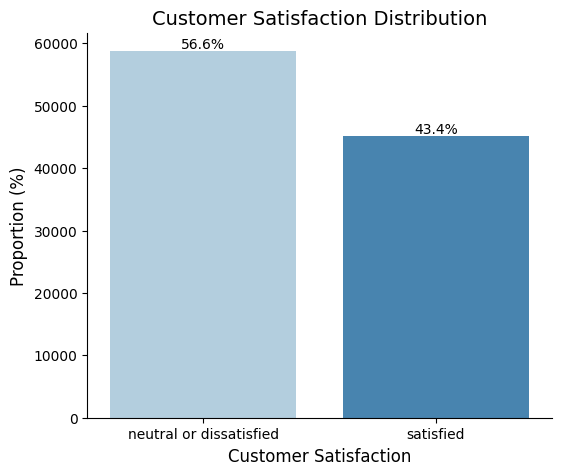

In [ ]:
# Melihat distribusi kolom target (kepuasan pelanggan)
# Hitung total data
total = len(y_train)
n_classes = y_train.nunique()

plt.figure(figsize=(6,5))
ax = sns.countplot(
    x=y_train,
    data=x_train,
    hue=y_train,
    palette=sns.color_palette("Blues", n_colors=n_classes)
)

ax.set_title("Customer Satisfaction Distribution", fontsize=14)
ax.set_xlabel("Customer Satisfaction", fontsize=12)
ax.set_ylabel("Proportion (%)", fontsize=12)

sns.despine()
ax.grid(False)

# Tambahkan label proporsi (%)
for container in ax.containers:
    labels = [f"{(v.get_height()/total)*100:.1f}%" for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10)

plt.show()

## Category Features vs Target

In [ ]:
def show_relationship_category_category(series1,
                                        series2,
                                        positive_class=None,
                                        return_result=False):
  df_temp = pd.crosstab(series1, series2)

  res = chi2_contingency(df_temp)
  coef = round(association(df_temp, method='cramer'), 2)

  if positive_class:
    df_temp[str(positive_class) + '_proba'] = \
      df_temp[positive_class] / (df_temp.sum(axis=1))

  if return_result:
    return (round(res.pvalue, 4), coef)

  print(series1.name, 'vs', series2.name)
  print('Chi2 Test p-Value      :', round(res.pvalue, 4))
  print('Cramer\'s V Coefficient :', coef)
  print(tabulate(
    df_temp,
    headers='keys',
    floatfmt=[''] + [',.0f'] * series2.unique().shape[0] + ['.1%'],
  ))

**Gender vs satisfaction**

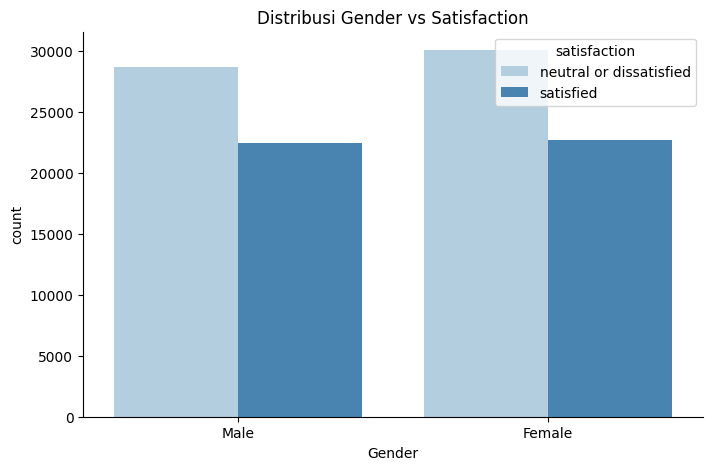

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Gender", hue=y_train, data=x_train, palette=sns.color_palette("Blues", n_colors=n_classes))
plt.title("Distribusi Gender vs Satisfaction")
sns.despine()
plt.grid(False)
plt.show()

**Customer Type vs satisfaction**

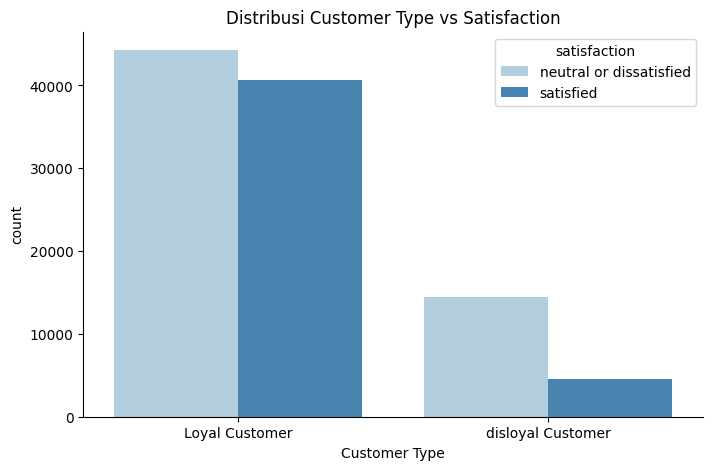

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Customer Type", hue=y_train, data=x_train, palette=sns.color_palette("Blues", n_colors=n_classes))
plt.title("Distribusi Customer Type vs Satisfaction")
sns.despine()
plt.grid(False)
plt.show()

**Type of Travel vs satisfaction**

In [ ]:
show_relationship_category_category(
  x_train['Type of Travel'],
  y_train,
  positive_class= 'neutral or dissatisfied',
)

Type of Travel vs satisfaction
Chi2 Test p-Value      : 0.0
Cramer's V Coefficient : 0.45
Type of Travel      neutral or dissatisfied    satisfied    neutral or dissatisfied_proba
----------------  -------------------------  -----------  -------------------------------
Business travel                      29,874       41,884                            41.6%
Personal Travel                      28,888        3,258                            89.9%


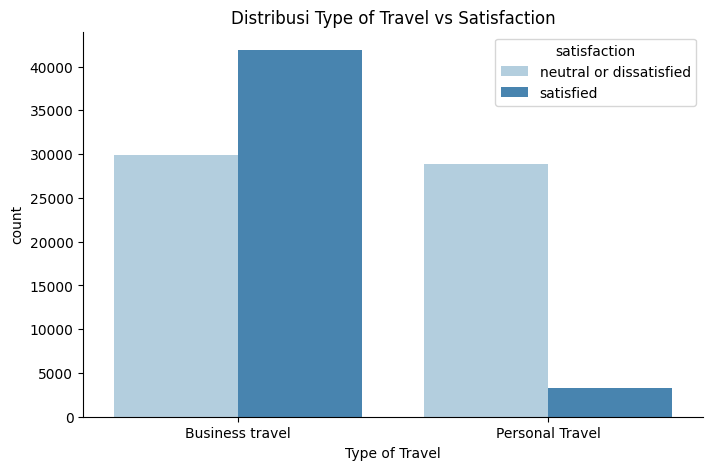

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Type of Travel", hue=y_train, data=x_train, palette=sns.color_palette("Blues", n_colors=n_classes))
plt.title("Distribusi Type of Travel vs Satisfaction")
sns.despine()
plt.grid(False)
plt.show()

**Class vs satisfaction**

In [ ]:
show_relationship_category_category(
  x_train['Class'],
  y_train,
  positive_class= 'neutral or dissatisfied',
)

Class vs satisfaction
Chi2 Test p-Value      : 0.0
Cramer's V Coefficient : 0.5
Class       neutral or dissatisfied    satisfied    neutral or dissatisfied_proba
--------  -------------------------  -----------  -------------------------------
Business                     15,255       34,582                            30.6%
Eco                          37,822        8,696                            81.3%
Eco Plus                      5,685        1,864                            75.3%


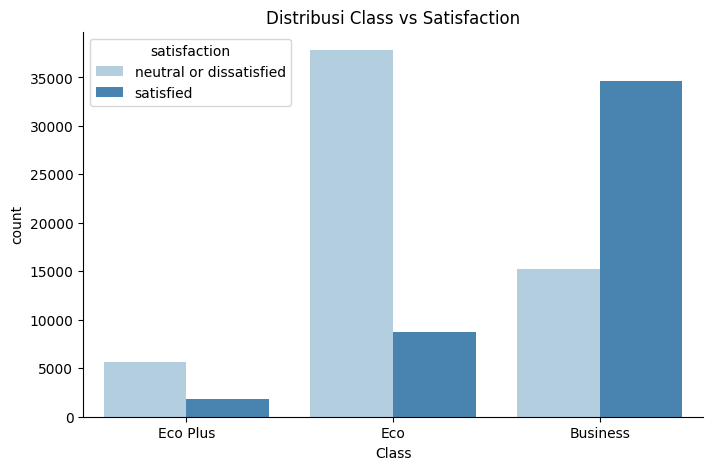

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Class", hue=y_train, data=x_train, palette=sns.color_palette("Blues", n_colors=n_classes))
plt.title("Distribusi Class vs Satisfaction")
sns.despine()
plt.grid(False)
plt.show()

**Rating Columns vs satisfaction**

In [ ]:
show_relationship_category_category(
  x_train['Online boarding'],
  y_train,
  positive_class= 'neutral or dissatisfied',
)

Online boarding vs satisfaction
Chi2 Test p-Value      : 0.0
Cramer's V Coefficient : 0.62
  Online boarding    neutral or dissatisfied    satisfied    neutral or dissatisfied_proba
-----------------  -------------------------  -----------  -------------------------------
                0                      1,091        1,396                            43.9%
                1                      9,130        1,466                            86.2%
                2                     15,566        2,021                            88.5%
                3                     18,676        2,986                            86.2%
                4                     11,609       19,126                            37.8%
                5                      2,690       18,147                            12.9%


In [ ]:
show_relationship_category_category(
  x_train['Inflight wifi service'],
  y_train,
  positive_class= 'neutral or dissatisfied',
)

Inflight wifi service vs satisfaction
Chi2 Test p-Value      : 0.0
Cramer's V Coefficient : 0.53
  Inflight wifi service    neutral or dissatisfied    satisfied    neutral or dissatisfied_proba
-----------------------  -------------------------  -----------  -------------------------------
                      0                          7        3,117                             0.2%
                      1                     12,014        5,875                            67.2%
                      2                     19,452        6,438                            75.1%
                      3                     19,307        6,499                            74.8%
                      4                      7,879       11,853                            39.9%
                      5                        103       11,360                             0.9%


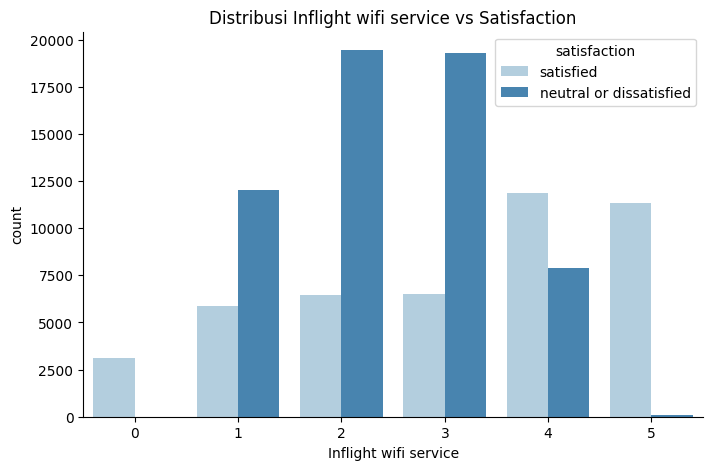

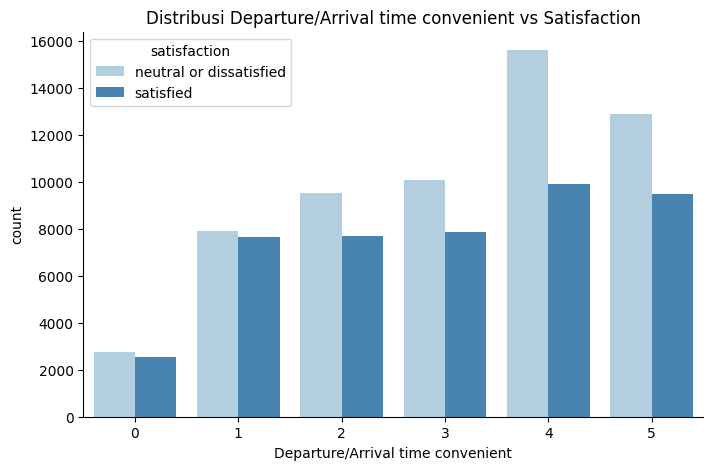

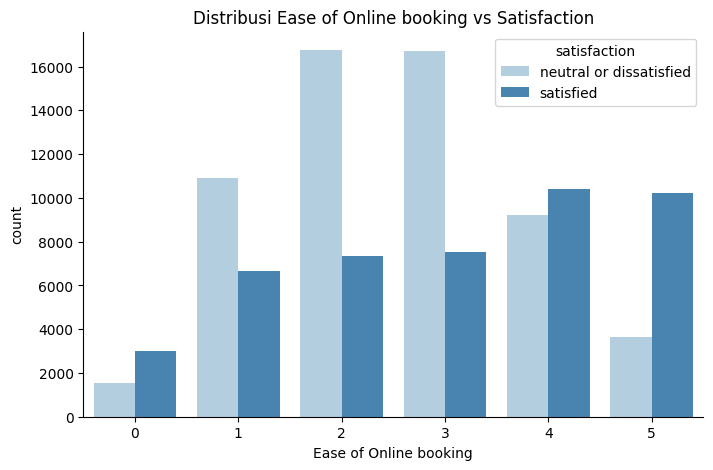

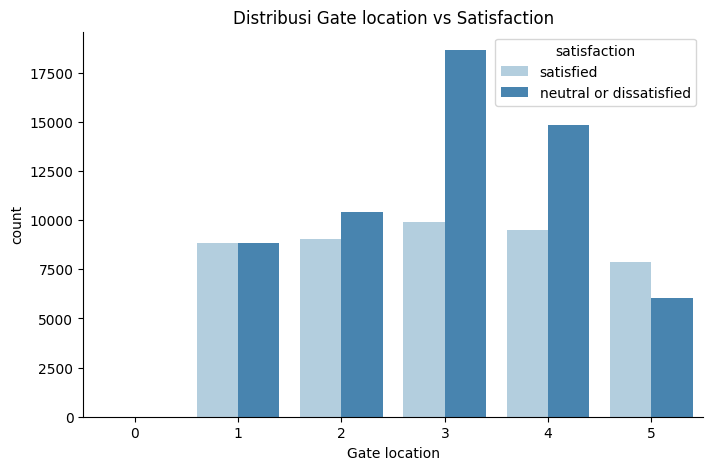

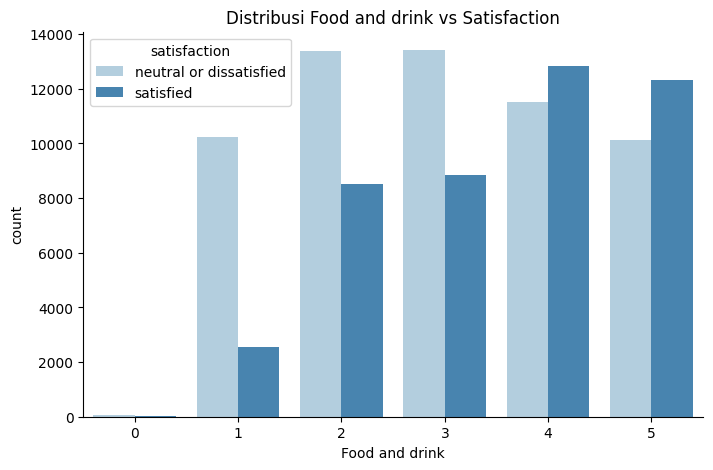

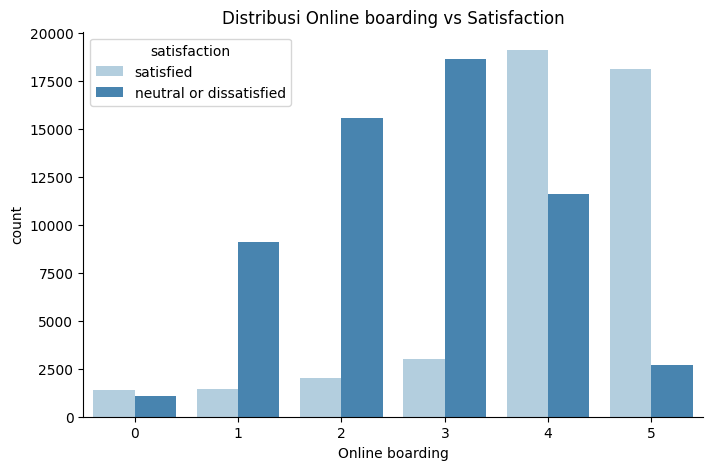

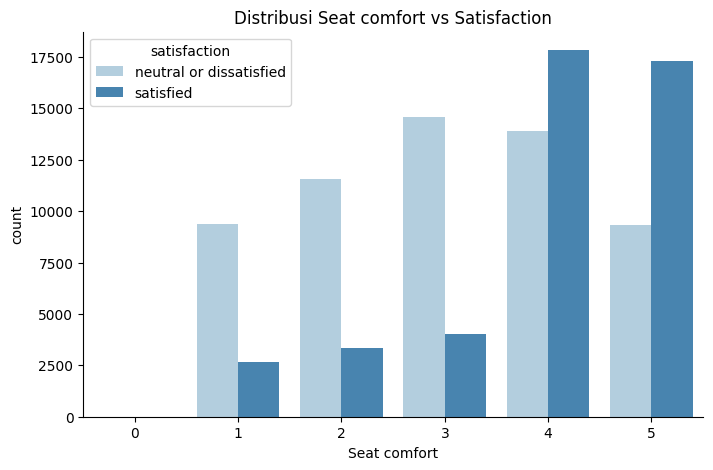

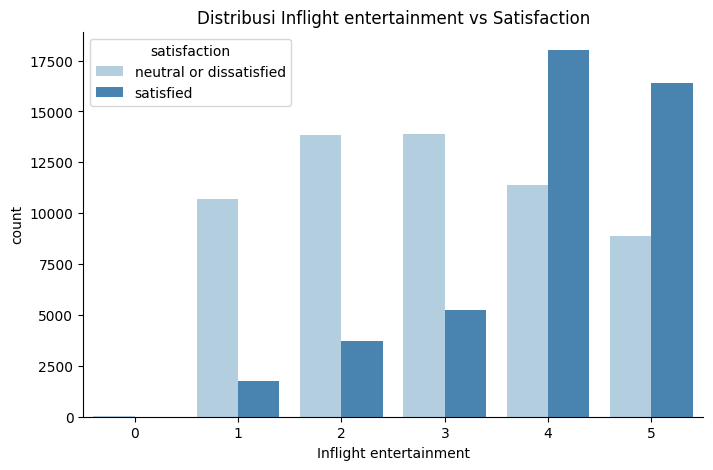

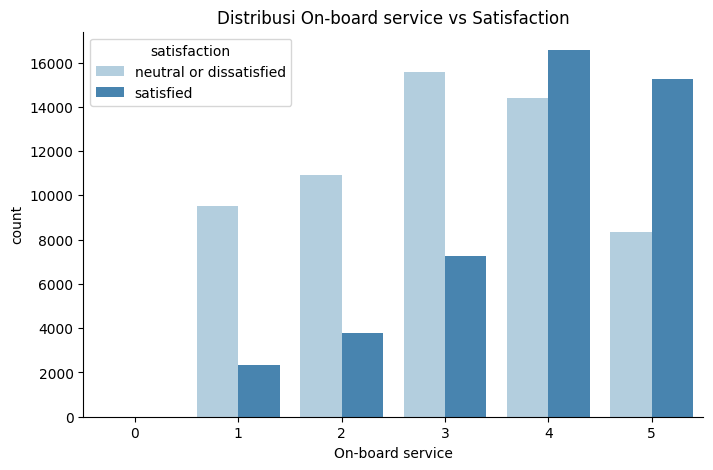

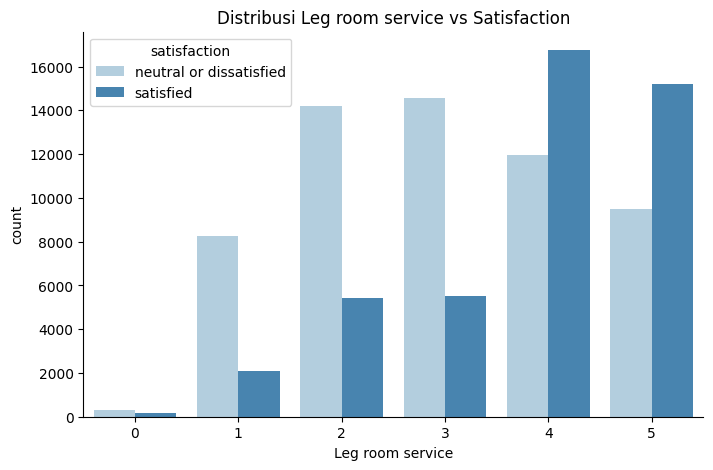

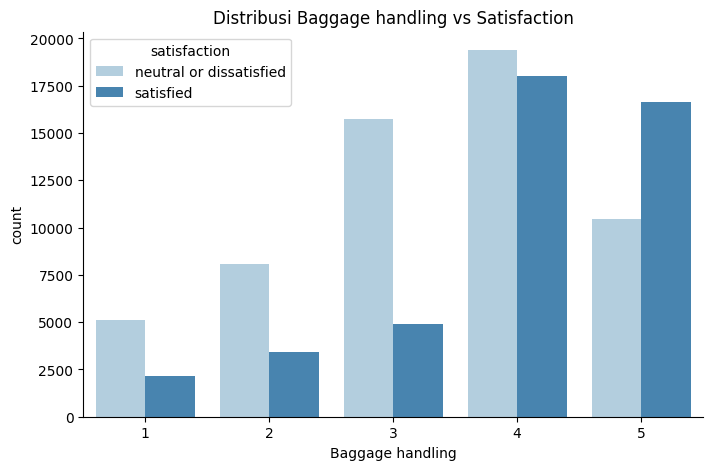

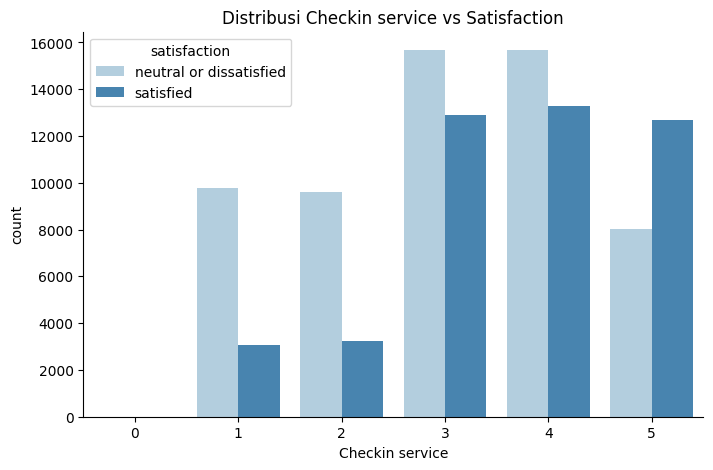

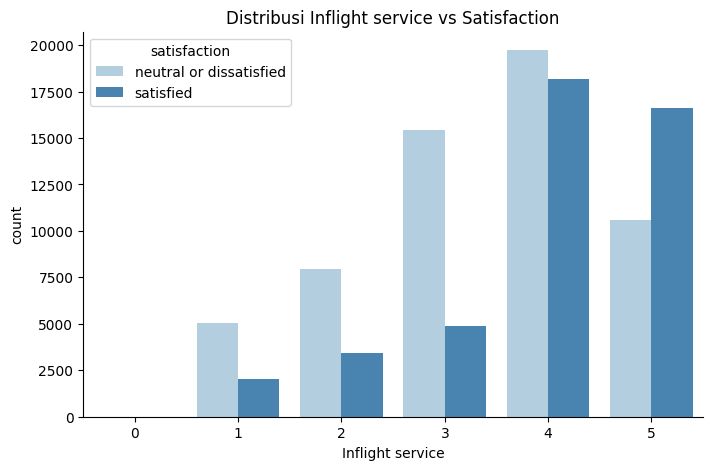

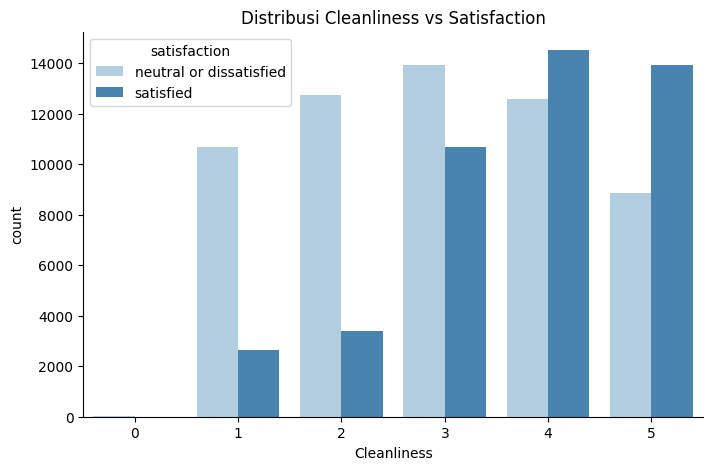

In [ ]:
# Menampilkan distribusi kolom ordinal (rating)
# Daftar kolom rating yang ingin dianalisis
rating_cols = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

for col in rating_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=x_train, x=col, hue=y_train, palette=sns.color_palette("Blues", n_colors=n_classes))
    plt.title(f"Distribusi {col} vs Satisfaction")
    sns.despine()
    plt.grid(False)
    plt.show()


## Numeric Features vs Target

**Age vs Customer Satisfaction**

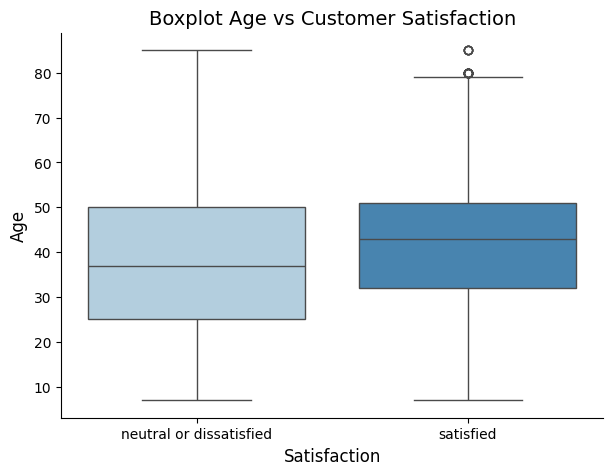

In [ ]:
# Menampilkan boxplot Age vs Customer Satisfaction
plt.figure(figsize=(7,5))
sns.boxplot(
    x=y_train,
    y="Age",
    data=x_train,
    palette=sns.color_palette("Blues", n_colors=n_classes)
)

plt.title("Boxplot Age vs Customer Satisfaction", fontsize=14)
plt.xlabel("Satisfaction", fontsize=12)
plt.ylabel("Age", fontsize=12)
sns.despine()     # Menghilangkan spines atas & kanan
plt.grid(False)   # Menghilangkan grid
plt.show()

**Flight Distance vs Customer Satisfaction**

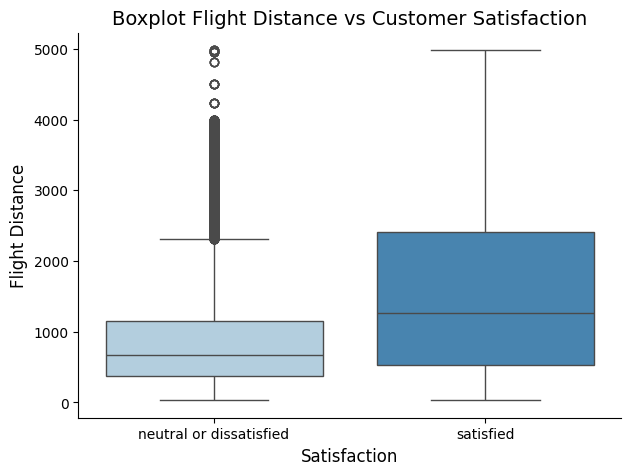

In [ ]:
# Menampilkan boxplot Flight Distance vs Customer Satisfaction
plt.figure(figsize=(7,5))
sns.boxplot(
    x=y_train,
    y="Flight Distance",
    data=x_train,
    palette=sns.color_palette("Blues", n_colors=n_classes)
)

plt.title("Boxplot Flight Distance vs Customer Satisfaction", fontsize=14)
plt.xlabel("Satisfaction", fontsize=12)
plt.ylabel("Flight Distance", fontsize=12)
sns.despine()     # Menghilangkan spines atas & kanan
plt.grid(False)   # Menghilangkan grid
plt.show()

**Departure Delay in Minutes vs Customer Satisfaction**

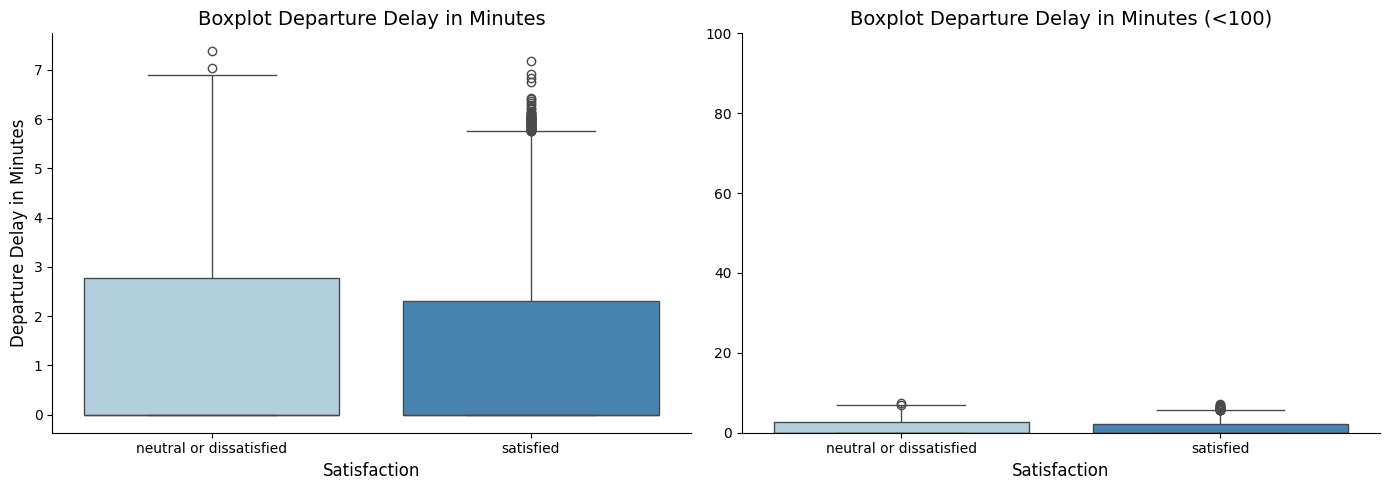

In [ ]:
# Menampilkan boxplot Departure Delay in Minutes vs Customer Satisfaction
# Membuat 2 subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# Plot 1: Boxplot utuh (waktu delay tidak dibatasi)
sns.boxplot(
    x=y_train,
    y="Departure Delay in Minutes",
    data=x_train,
    palette=sns.color_palette("Blues", n_colors=n_classes),
    ax=axes[0]
)

axes[0].set_title("Boxplot Departure Delay in Minutes", fontsize=14)
axes[0].set_xlabel("Satisfaction", fontsize=12)
axes[0].set_ylabel("Departure Delay in Minutes", fontsize=12)

# Plot 2: Boxplot terpotong (fokus <100 menit)
sns.boxplot(
    x=y_train,
    y="Departure Delay in Minutes",
    data=x_train,
    palette=sns.color_palette("Blues", n_colors=n_classes),
    ax=axes[1]
)
axes[1].set_ylim(0, 100)  # Membatasi ke <100 menit
axes[1].set_title("Boxplot Departure Delay in Minutes (<100)", fontsize=14)
axes[1].set_xlabel("Satisfaction", fontsize=12)
axes[1].set_ylabel("")

# Merapikan layout
sns.despine()
plt.tight_layout()
plt.show()


**Arrival Delay in Minutes vs Customer Satisfaction**

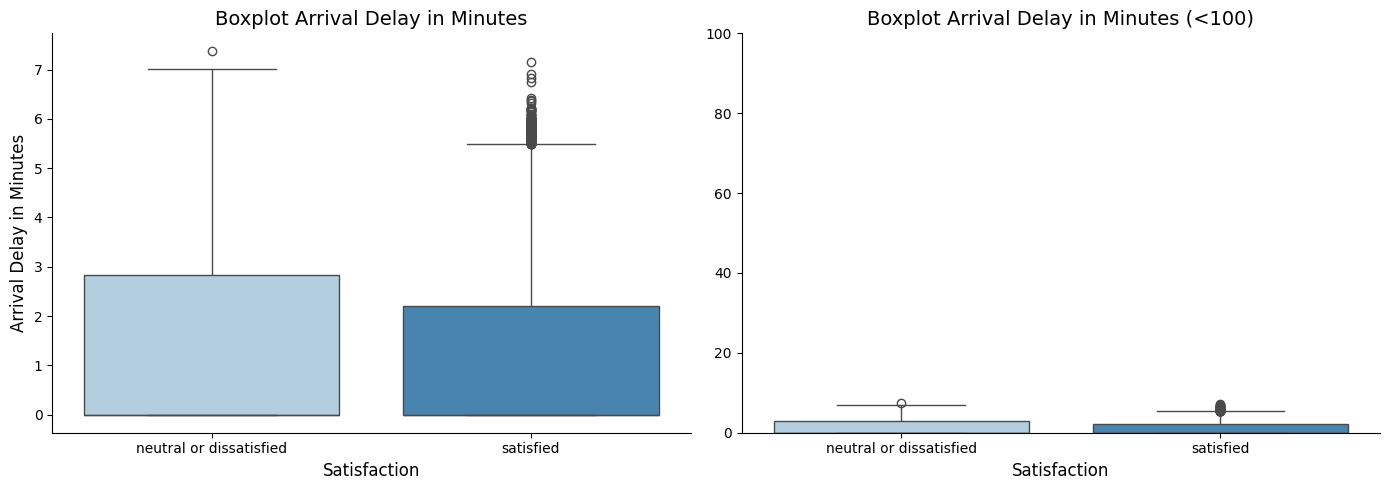

In [ ]:
# Menampilkan boxplot Arrival Delay in Minutes vs Customer Satisfaction
# Buat 2 subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# Plot 1: Boxplot utuh (waktu delay tidak dibatasi)
sns.boxplot(
    x=y_train,
    y="Arrival Delay in Minutes",
    data=x_train,
    palette=sns.color_palette("Blues", n_colors=n_classes),
    ax=axes[0]
)

axes[0].set_title("Boxplot Arrival Delay in Minutes", fontsize=14)
axes[0].set_xlabel("Satisfaction", fontsize=12)
axes[0].set_ylabel("Arrival Delay in Minutes", fontsize=12)

# Plot 2: Boxplot terpotong (fokus <100 menit)
sns.boxplot(
    x=y_train,
    y="Arrival Delay in Minutes",
    data=x_train,
    palette=sns.color_palette("Blues", n_colors=n_classes),
    ax=axes[1]
)
axes[1].set_ylim(0, 100)  # Membatasi ke <100 menit
axes[1].set_title("Boxplot Arrival Delay in Minutes (<100)", fontsize=14)
axes[1].set_xlabel("Satisfaction", fontsize=12)
axes[1].set_ylabel("")

# Merapikan layout
sns.despine()
plt.tight_layout()
plt.show()


## Bivariate Analysis

### Category vs Category

Asterisk (*) indicates significant relationship between the two
variables based on Chi2 Test (p-value < 0.05). The number shown in each
cell is the relationship strength coefficient based on Cramer's V.



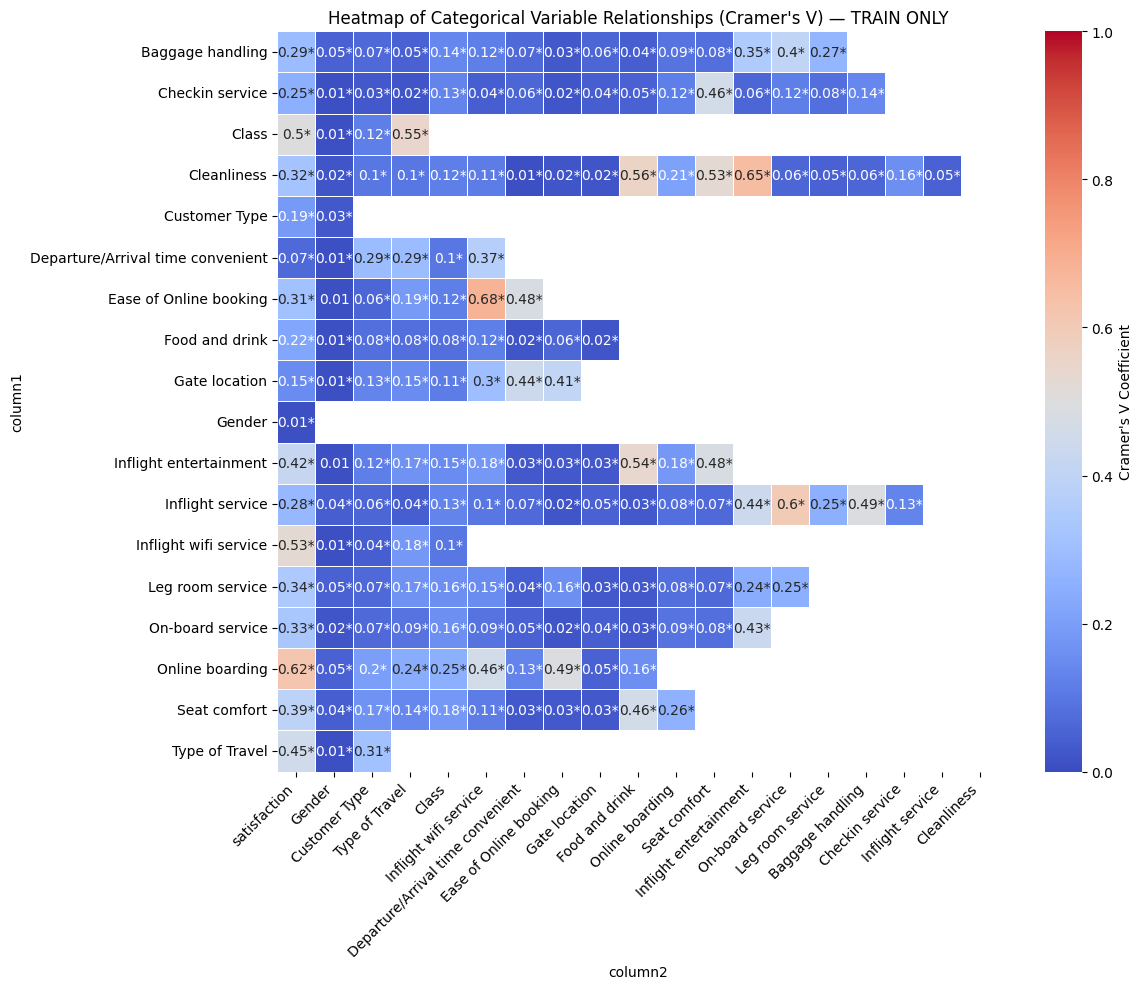

In [ ]:
# DataFrame train-only
# inner join by index untuk mencegah kebocoran dan menjaga alignment
y_name = getattr(y_train, "name", None) or "satisfaction"               # fallback nama target
target_column = y_name                                                  # atau set manual: target_column = "satisfaction"

y_series = (
    y_train if isinstance(y_train, pd.Series)
    else pd.Series(y_train, index=x_train.index, name=target_column)
)
df_train = pd.concat([x_train, y_series.rename(target_column)], axis=1, join="inner")

# (Opsional tapi disarankan) pastikan kolom kategori bertipe kategorikal
# agar fungsi Cramer's V/Chi2 memperlakukan sebagai kategori, bukan numerik
for c in category_columns:
    df_train[c] = df_train[c].astype("category")
df_train[target_column] = df_train[target_column].astype("category")

# 2) Jalankan loop yang sama tapi menggunakan df_train
corrs = [[], [], [], []]  # col1, col2, pvalue, coef

for i in range(len(category_columns)):
    for j in range(i+1, len(category_columns)):
        pvalue, coef = show_relationship_category_category(
            df_train[category_columns[i]],
            df_train[category_columns[j]],
            return_result=True,
        )
        corrs[0].extend([category_columns[i], category_columns[j]])
        corrs[1].extend([category_columns[j], category_columns[i]])
        if i > j:
            corrs[2].extend([pvalue, None])
            corrs[3].extend([coef, None])
        else:
            corrs[2].extend([None, pvalue])
            corrs[3].extend([None, coef])

# feature vs target (train only)
for i in range(len(category_columns)):
    pvalue, coef = show_relationship_category_category(
        df_train[category_columns[i]],
        df_train[target_column],
        return_result=True,
    )
    corrs[0].append(category_columns[i])
    corrs[1].append(target_column)
    corrs[2].append(pvalue)
    corrs[3].append(coef)

df_temp = pd.DataFrame({
  'column1': corrs[0],
  'column2': corrs[1],
  'pvalue': corrs[2],
  'coef': corrs[3],
})

df_temp['annot'] = np.where(
  df_temp['pvalue'].isnull(),
  None,
  np.where(df_temp['pvalue'] > 0.05, df_temp['coef'], df_temp['coef'].astype(str) + '*')
)

df_coef = df_temp.pivot_table(index='column1', columns='column2', values='coef', aggfunc='max')
df_coef = df_coef.reindex(columns=[target_column] + category_columns)

df_annot = df_temp.pivot_table(index='column1', columns='column2', values='annot', aggfunc='max')
df_annot = df_annot.reindex(columns=[target_column] + category_columns)

print("""Asterisk (*) indicates significant relationship between the two
variables based on Chi2 Test (p-value < 0.05). The number shown in each
cell is the relationship strength coefficient based on Cramer's V.
""")

plt.figure(figsize=(12, 10))
sns.heatmap(
    df_coef, vmin=0, vmax=1, annot=df_annot, fmt='',
    cmap='coolwarm', linewidths=0.5, cbar_kws={'label': "Cramer's V Coefficient"}
)
plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.title("Heatmap of Categorical Variable Relationships (Cramer's V) — TRAIN ONLY")
plt.tight_layout()
plt.show()


### Category vc Numeric

Asterisk (*) indicates significant relationship (p-value < 0.05)
between the numeric variable and the category based on:
- Point-Biserial (binary category);
- One-way ANOVA (multi-class category).

The number shown in each cell is the association strength:
- Point-Biserial r (binary) in [-1, 1];
- Correlation Ratio η (multi-class) in [0, 1].



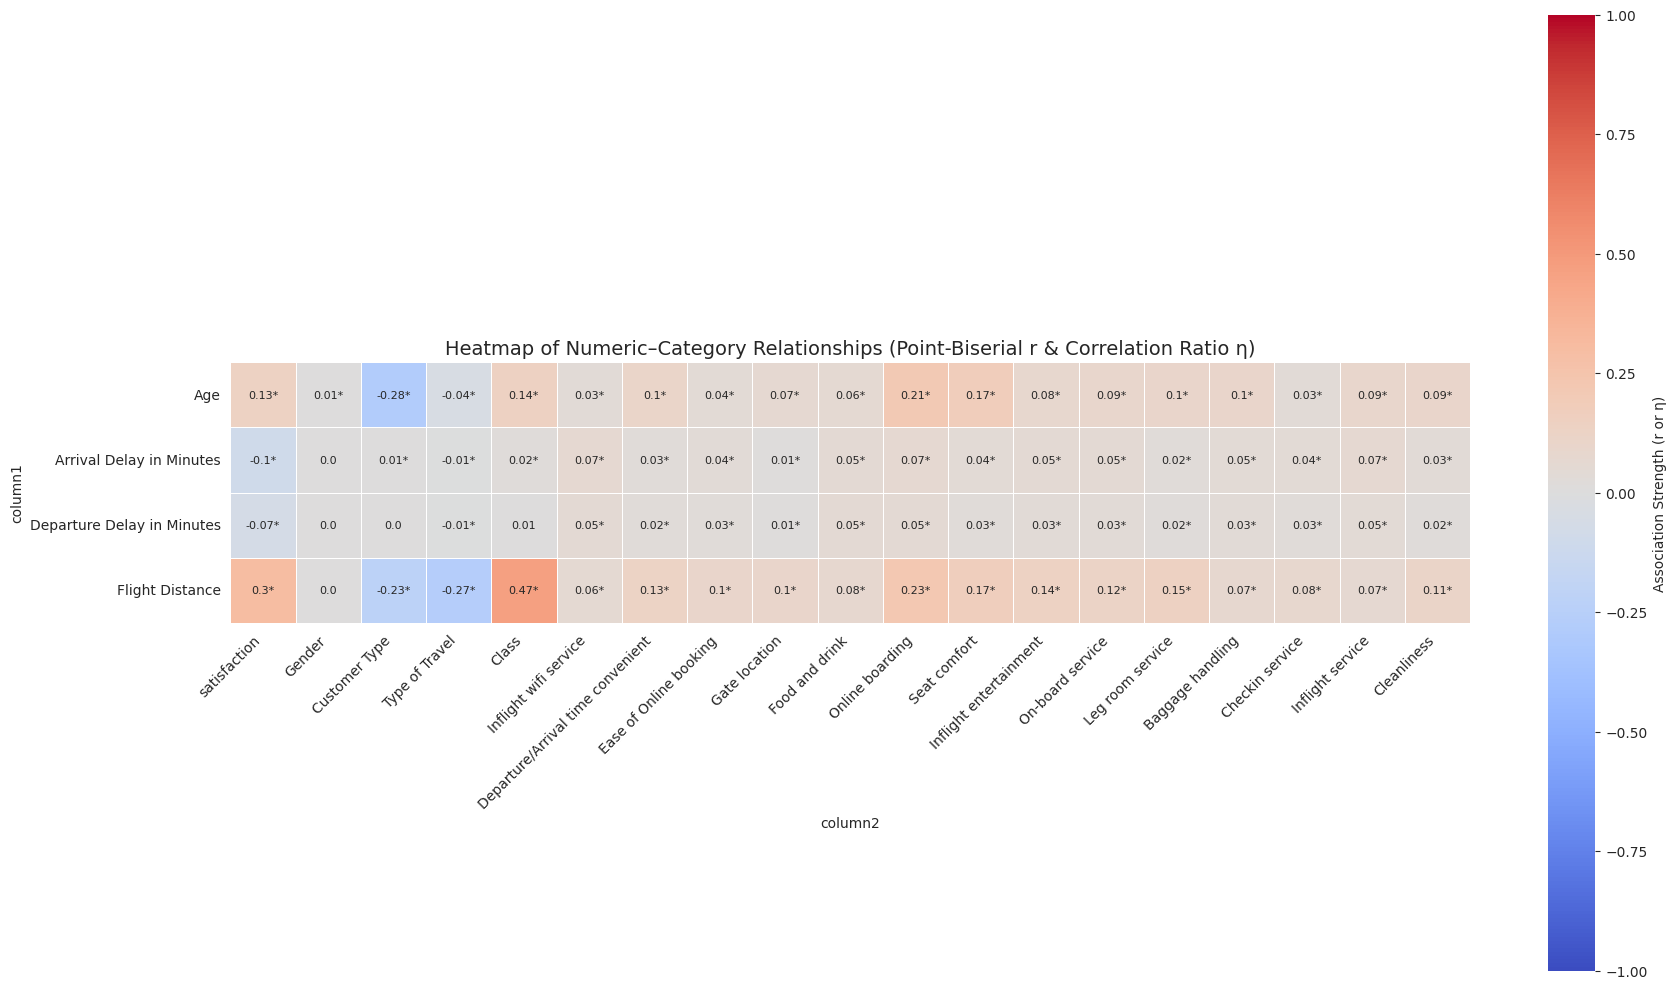

In [ ]:
# ===== Helper: numeric vs categorical =====
def relationship_numeric_category(x: pd.Series, y: pd.Series):
    m = (~x.isna()) & (~y.isna())
    x = x[m]; y = y[m]

    if x.nunique() <= 1 or y.nunique() == 0:
        return np.nan, np.nan

    if y.nunique() == 2:
        # Point-biserial
        y_codes = pd.Categorical(y).codes
        r, p = pointbiserialr(y_codes, x)
        return p, r
    else:
        # ANOVA + correlation ratio (eta)
        groups = [x[y == lvl] for lvl in y.cat.categories if (y == lvl).any()]
        if len(groups) < 2: return np.nan, np.nan
        try:
            f, p = f_oneway(*groups)
        except Exception:
            p = np.nan
        mu = x.mean()
        ss_between = sum([len(g) * (g.mean() - mu) ** 2 for g in groups])
        ss_total = ((x - mu) ** 2).sum()
        eta = np.sqrt(ss_between / ss_total) if ss_total > 0 else np.nan
        return p, eta

# ===== Hitung relasi =====
corrs = [[], [], [], []]

for num_col in numeric_columns:
    for cat_col in category_columns:
        pvalue, coef = relationship_numeric_category(df_train[num_col], df_train[cat_col])
        corrs[0].append(num_col)
        corrs[1].append(cat_col)
        corrs[2].append(pvalue)
        corrs[3].append(coef)

for num_col in numeric_columns:
    pvalue, coef = relationship_numeric_category(df_train[num_col], df_train[target_column])
    corrs[0].append(num_col)
    corrs[1].append(target_column)
    corrs[2].append(pvalue)
    corrs[3].append(coef)

df_temp = pd.DataFrame({
    'column1': corrs[0],
    'column2': corrs[1],
    'pvalue': corrs[2],
    'coef': corrs[3],
})

# ===== Annotasi ringkas =====
df_temp['annot'] = np.where(
    df_temp['pvalue'].isnull(), None,
    np.where(
        df_temp['pvalue'] > 0.05,
        df_temp['coef'].round(2),                         # angka 2 desimal
        df_temp['coef'].round(2).astype(str) + '*'        # tambah * kalau signifikan
    )
)

# ===== Pivot untuk heatmap =====
df_coef = df_temp.pivot_table(index='column1', columns='column2', values='coef', aggfunc='max')
df_coef = df_coef.reindex(columns=[target_column] + category_columns)

df_annot = df_temp.pivot_table(index='column1', columns='column2', values='annot', aggfunc='max')
df_annot = df_annot.reindex(columns=[target_column] + category_columns)

print("""Asterisk (*) indicates significant relationship (p-value < 0.05)
between the numeric variable and the category based on:
- Point-Biserial (binary category);
- One-way ANOVA (multi-class category).

The number shown in each cell is the association strength:
- Point-Biserial r (binary) in [-1, 1];
- Correlation Ratio η (multi-class) in [0, 1].
""")

# ===== Plot heatmap =====
plt.figure(figsize=(18, 10))  # lebih lebar
sns.set_style("whitegrid")

sns.heatmap(
    df_coef,
    vmin=-1, vmax=1, center=0,
    annot=df_annot,
    fmt='',
    annot_kws={"size": 8},     # perkecil ukuran font annot
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={'label': "Association Strength (r or η)"}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Heatmap of Numeric–Category Relationships (Point-Biserial r & Correlation Ratio η)", fontsize=14)
plt.tight_layout()
plt.show()

### Numeric vs Numeric

In [ ]:
# Hitung korelasi Spearman hanya di data train
df_corr = x_train[numeric_columns].corr(method='spearman')
df_corr

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.073112,-0.008762,-0.011496
Flight Distance,0.073112,1.000000,0.026091,-0.001565
Departure Delay in Minutes,-0.008762,0.026091,1.000000,0.736782
Arrival Delay in Minutes,-0.011496,-0.001565,0.736782,1.000000


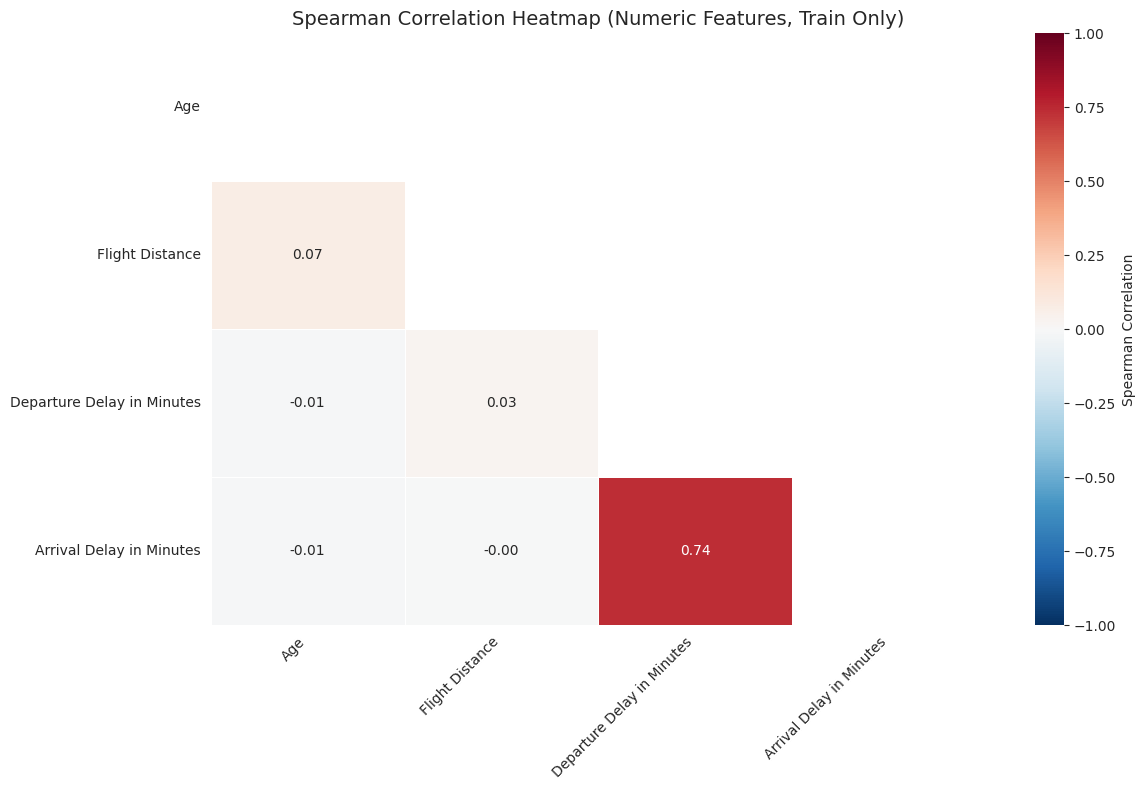

In [ ]:
# Buat mask segitiga atas
mask = np.zeros_like(df_corr, dtype=bool)   # np.bool → bool
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.set_style("white")

sns.heatmap(
    df_corr,
    vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    mask=mask,
    cmap="RdBu_r",
    linewidths=0.5,
    cbar_kws={'label': "Spearman Correlation"}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Spearman Correlation Heatmap (Numeric Features, Train Only)", fontsize=14)
plt.tight_layout()
plt.show()


# Data Preprocessing

## Encode Target

In [ ]:
y_train = y_train.map({"neutral or dissatisfied": 1, "satisfied": 0})
y_test  = y_test.map({"neutral or dissatisfied": 1, "satisfied": 0})

## Encode Ordinal Features

In [ ]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [ ]:
encoder = OrdinalEncoder(
    categories=[['Eco', 'Eco Plus', 'Business']],  # Urutan sesuai ordinal
    handle_unknown='error',
)

x_train['ClassEncoded'] = encoder.fit_transform(x_train[['Class']])
x_test['ClassEncoded'] = encoder.transform(x_test[['Class']])

In [ ]:
x_train = x_train.drop(columns= 'Class')
x_test = x_test.drop(columns= 'Class')

## Encode Nominal Features

In [ ]:
nominal_columns = [
    'Gender',
    'Customer Type',
    'Type of Travel',
]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Custom feature name function
def custom_feature_name(transformer_name, feature_name):
  return f'{feature_name}'

# OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first')
transformer = ColumnTransformer(
  transformers=[
    ('onehotencoder', encoder, nominal_columns),
  ],
  verbose_feature_names_out=custom_feature_name,
)

# Transformasi data
transformed = transformer.fit_transform(x_train)

# Buat DataFrame baru dari hasil transformasi
df_encoded = pd.DataFrame(
  transformed,
  columns=transformer.get_feature_names_out(),
)
df_encoded.index = x_train.index

# Concatenate with x_train and drop original nominal columns
x_train = pd.concat([x_train, df_encoded], axis=1)
x_train = x_train.drop(columns=nominal_columns)


x_train.sample(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,ClassEncoded,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
39358,23,411,1,3,0,5,5,0,5,5,...,5,2,2,5,1.609438,1.098612,0.0,1.0,1.0,0.0
51030,31,585,5,5,5,5,4,4,4,4,...,1,4,4,4,0.000000,2.197225,2.0,0.0,0.0,0.0
700,47,829,1,1,1,1,3,5,5,5,...,5,4,5,4,3.367296,3.332205,2.0,0.0,0.0,0.0
7458,39,444,4,3,4,4,5,5,4,3,...,3,5,3,4,0.000000,0.000000,2.0,1.0,0.0,0.0
71803,28,1235,5,5,5,2,2,0,2,2,...,4,3,5,2,0.000000,0.000000,2.0,0.0,1.0,0.0


In [ ]:
transformed = transformer.transform(x_test)

df_encoded = pd.DataFrame(
  transformed,
  columns=transformer.get_feature_names_out(),
)
df_encoded.index = x_test.index

# Concatenate with x_test and drop original nominal columns
df_encoded = pd.concat([x_test, df_encoded], axis=1)
x_test = df_encoded.drop(columns=nominal_columns)


x_test.sample(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,ClassEncoded,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
53838,35,347,4,4,4,4,5,3,2,4,...,4,2,4,5,0.000000,0.000000,2.0,0.0,0.0,0.0
53502,36,3958,1,1,1,1,2,4,4,5,...,5,3,5,4,1.609438,1.386294,2.0,1.0,0.0,0.0
66402,7,1028,1,4,1,2,2,1,3,2,...,4,5,4,2,1.791759,0.693147,0.0,0.0,0.0,1.0
116896,45,2899,3,3,5,3,2,5,4,5,...,5,5,5,5,0.000000,0.000000,2.0,0.0,0.0,0.0
38461,42,3694,2,2,5,2,2,4,4,4,...,4,3,4,4,0.000000,0.000000,2.0,0.0,0.0,0.0


## Scale Numeric Features

In [ ]:
units = {
  'Age': 1,
  'Flight Distance': 1,
  'Departure Delay in Minutes': 1,
  'Arrival Delay in Minutes': 1,
}

mins = []
maxs = []
changes = []

# Select only the numeric columns that still exist in the DataFrame
x_train_numeric = x_train[numeric_columns]
x_test_numeric = x_test[numeric_columns]


for column in numeric_columns:
  scaler = MinMaxScaler()
  x_train[column + 'Scaled'] = scaler.fit_transform(x_train_numeric[[column]])
  x_test[column + 'Scaled'] = scaler.transform(x_test_numeric[[column]])

  mins.append(scaler.data_min_[0])
  maxs.append(scaler.data_max_[0])
  changes.append(scaler.scale_[0] * units[column])

pd.DataFrame({
  'column': numeric_columns,
  'unit': [units[c] for c in numeric_columns],
  'change': changes,
  'min': mins,
  'max': maxs,
})

,column,unit,change,min,max
0,Age,1,0.012821,7.0,85.000000
1,Flight Distance,1,0.000202,31.0,4983.000000
2,Departure Delay in Minutes,1,0.135623,0.0,7.373374
3,Arrival Delay in Minutes,1,0.135716,0.0,7.368340


In [ ]:
x_train = x_train.drop(columns=numeric_columns)
x_test = x_test.drop(columns=numeric_columns)

# Modeling

### **Decision Tree**

#### Train

In [ ]:
dt_params = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy", "log_loss"]
}
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring="recall", n_jobs=-1)
dt_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [ ]:
print("Best Parameters:", dt_grid.best_params_)
print("Best CV Recall:", dt_grid.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Recall: 0.9632927317139369


#### Evaluate

In [ ]:
# Model terbaik dari hasil GridSearch
best_dt = dt_grid.best_estimator_

In [ ]:
y_train_pred = best_dt.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     45142
           1       0.94      0.97      0.96     58762

    accuracy                           0.95    103904
   macro avg       0.95      0.95      0.95    103904
weighted avg       0.95      0.95      0.95    103904



In [ ]:
y_test_pred = best_dt.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11286
           1       0.94      0.97      0.95     14690

    accuracy                           0.95     25976
   macro avg       0.95      0.94      0.95     25976
weighted avg       0.95      0.95      0.95     25976



AUC Score: 0.9883


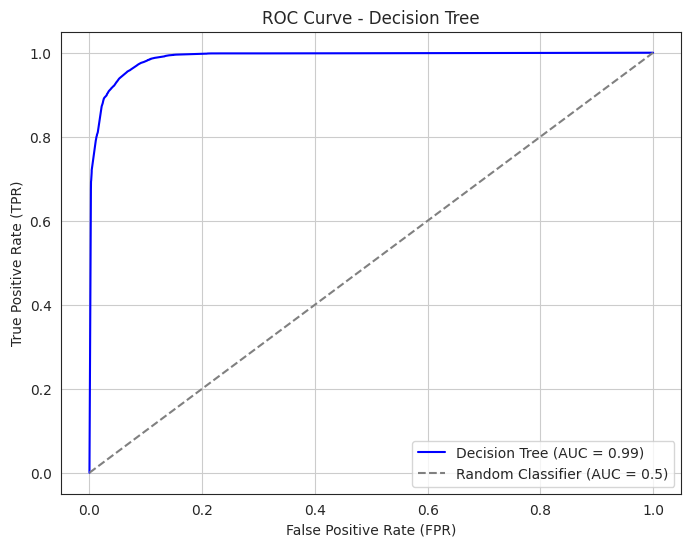

In [ ]:
# Predict probabilitas kelas positif (dissatisfied) = 1)
y_test_proba = best_dt.predict_proba(x_test)[:, 1]

# Hitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Hitung AUC
auc_score = roc_auc_score(y_test, y_test_proba)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### **Random Forest Model**

#### Train

In [ ]:
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

# Define model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Randomized search
rf_random = RandomizedSearchCV(
    rf,
    rf_params,
    n_iter=10,          # 10 kombinasi acak
    cv=3,               # 3-fold cross validation
    scoring="recall", # fokus recall
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit ke data train
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='recall', verbose=1)

In [ ]:
print("Best Parameters:", rf_random.best_params_)
print("Best CV Recall:", rf_random.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Best CV Recall: 0.9774684125635598


#### Evaluate

In [ ]:
# Model terbaik dari hasil RandomizedSearch
best_rf = rf_random.best_estimator_

In [ ]:
y_train_pred = best_rf.predict(x_train)
print(classification_report(y_train, y_train_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     45142
           1       0.98      1.00      0.99     58762

    accuracy                           0.99    103904
   macro avg       0.99      0.98      0.99    103904
weighted avg       0.99      0.99      0.99    103904


 Confusion Matrix:
[[43888  1254]
 [  264 58498]]


In [ ]:
y_test_pred = best_rf.predict(x_test)
print(classification_report(y_test, y_test_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11286
           1       0.96      0.98      0.97     14690

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976


 Confusion Matrix:
[[10628   658]
 [  304 14386]]


AUC Score: 0.9940


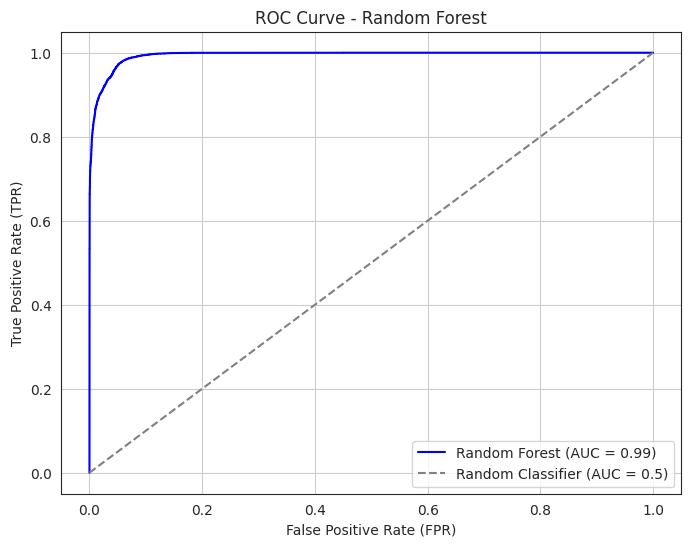

In [ ]:
# Predict probabilitas kelas positif (dissatisfied = 1)
y_test_proba = best_rf.predict_proba(x_test)[:, 1]

# Hitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Hitung AUC
auc_score = roc_auc_score(y_test, y_test_proba)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### **XGBost**

#### Train

In [ ]:
# definisikan model XGBoost
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# definisikan parameter space
xgb_params = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3]
}

# Randomized Search
xgb_random = RandomizedSearchCV(
    xgb,
    xgb_params,
    n_iter=30,   # sampling 30 kombinasi acak
    cv=3,        # 3-fold CV lebih cepat
    scoring="recall",  # atau ganti dengan f1/accuracy sesuai fokus
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit ke data train
xgb_random.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='recall', verbose=1)

In [ ]:
print("Best Params:", xgb_random.best_params_)
print("Best CV Recall:", xgb_random.best_score_)

Best Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
Best CV Recall: 0.9807188148005618


#### Evaluate

In [ ]:
# Model terbaik dari hasil RandomizedSearch
best_xgb = xgb_random.best_estimator_

In [ ]:
y_train_pred = best_xgb.predict(x_train)
print(classification_report(y_train, y_train_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     45142
           1       0.97      0.99      0.98     58762

    accuracy                           0.98    103904
   macro avg       0.98      0.98      0.98    103904
weighted avg       0.98      0.98      0.98    103904


 Confusion Matrix:
[[43613  1529]
 [  444 58318]]


In [ ]:
y_test_pred = best_xgb.predict(x_test)
print(classification_report(y_test, y_test_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11286
           1       0.96      0.98      0.97     14690

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976


 Confusion Matrix:
[[10629   657]
 [  278 14412]]


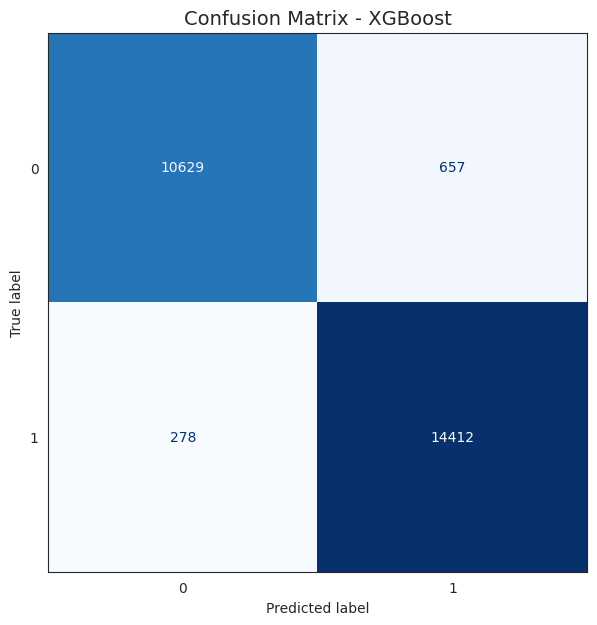

In [ ]:
# Prediksi
y_pred = best_xgb.predict(x_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_xgb.classes_)

# Tampilkan plot confusion matrix dengan colormap biru
fig, ax = plt.subplots(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_xgb.classes_)
disp.plot(ax=ax, cmap="Blues", colorbar=False)  # cmap biru
plt.title("Confusion Matrix - XGBoost", fontsize=14)
plt.grid(False)
plt.show()

AUC Score (XGBoost): 0.9951


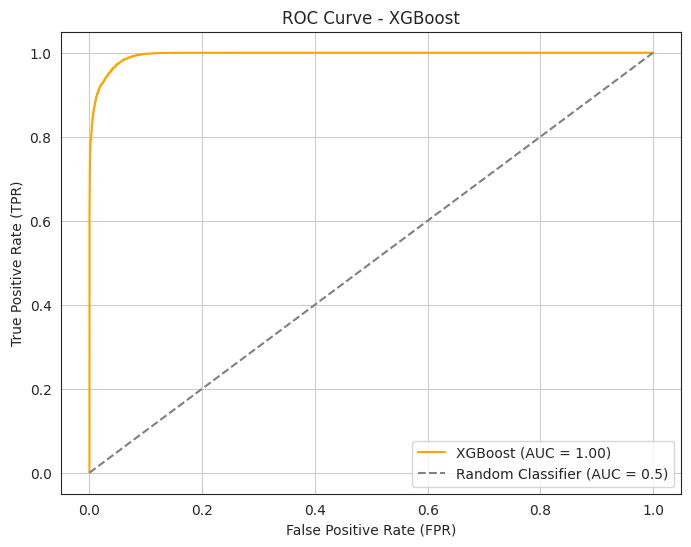

In [ ]:
# Prediksi probabilitas di test set
y_test_proba_xgb = best_xgb.predict_proba(x_test)[:, 1]

# Hitung ROC AUC
auc_xgb = roc_auc_score(y_test, y_test_proba_xgb)
print(f"AUC Score (XGBoost): {auc_xgb:.4f}")

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Logistic Regression

#### Train

In [ ]:
# Model dasar
logreg = LogisticRegression(
    max_iter=1000,
    )

# Hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],   # Regularisasi (semakin kecil, semakin kuat regularisasi)
    'penalty': ['l2'],                           # L2 = Ridge logistic regression (umumnya stabil)
    'solver': ['lbfgs', 'liblinear']             # Dua solver populer
}

# Inisialisasi RandomizedSearchCV
logreg_random = RandomizedSearchCV(logreg, param_grid, n_iter=10, cv=5, verbose=1, random_state=42, scoring='recall')

# Fit RandomizedSearchCV pada data latih (x_train, y_train)
logreg_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear']},
                   random_state=42, scoring='recall', verbose=1)

In [ ]:
print("Best Params:", logreg_random.best_params_)
print("Best CV Recall:", logreg_random.best_score_)

Best Params: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
Best CV Recall: 0.9045642127667881


#### Evaluate

In [ ]:
# Model terbaik dari hasil RandomizedSearch
best_logreg = logreg_random.best_estimator_

In [ ]:
y_train_pred = best_logreg.predict(x_train)
print(classification_report(y_train, y_train_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     45142
           1       0.88      0.90      0.89     58762

    accuracy                           0.87    103904
   macro avg       0.87      0.87      0.87    103904
weighted avg       0.87      0.87      0.87    103904


 Confusion Matrix:
[[37699  7443]
 [ 5588 53174]]


In [ ]:
y_test_pred = best_logreg.predict(x_test)
print(classification_report(y_test, y_test_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     11286
           1       0.88      0.91      0.89     14690

    accuracy                           0.88     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.88      0.88      0.87     25976


 Confusion Matrix:
[[ 9437  1849]
 [ 1394 13296]]


AUC Score (Logistic Regression): 0.9272


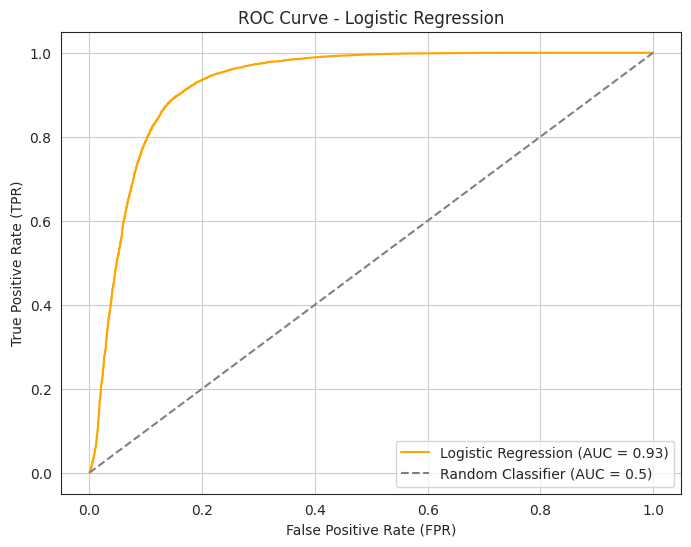

In [ ]:
# Prediksi probabilitas di test set
y_test_proba_logreg = best_logreg.predict_proba(x_test)[:, 1]

# Hitung ROC AUC
auc_logreg = roc_auc_score(y_test, y_test_proba_logreg)
print(f"AUC Score (Logistic Regression): {auc_logreg:.4f}")

# ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_proba_logreg)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Model Interpretation

## Explain model with SHAP

In [ ]:
explainer = shap.TreeExplainer(
  best_xgb,
  x_test,
  feature_perturbation='interventional',
  model_output='probability',
)

explanation = explainer(x_test, check_additivity=False)
shap_values = explanation.values

100%|===================| 25934/25976 [10:03<00:00]       

### Feature Importance

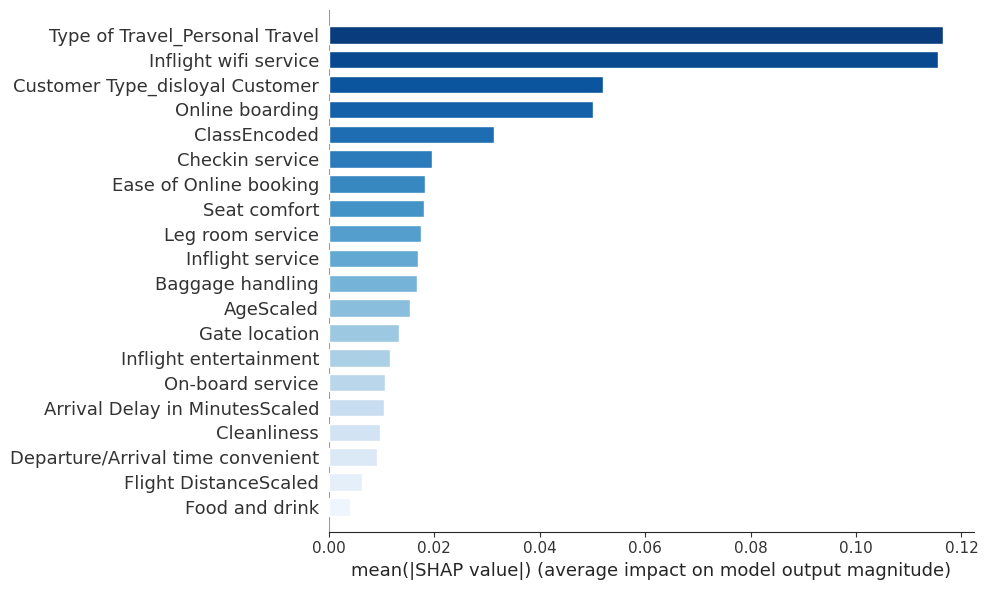

In [ ]:
# Gunakan palet biru lembut (list of colors)
blue_palette = sns.color_palette("Blues", n_colors=20)

# Plot SHAP dengan warna biru gradasi
shap.summary_plot(shap_values, x_test, plot_type="bar", color=blue_palette, show=False)

plt.gcf().set_size_inches(10, 6)  # perbesar canvas agar tidak terpotong
plt.tight_layout()
plt.show()



Beberapa feature yang paling berpengaruh dalam memprediksi kepuasan pelanggan berdasar SHAP antara lain :

| Rank | Fitur                               | Insight                                                                                                                                   |
| ---- | ----------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| 1    | **Type of Travel (Personal)**       | Jenis perjalanan adalah faktor paling berpengaruh, penumpang **personal travel** cenderung lebih tidak puas dibanding business traveler. |
| 2    | **Inflight wifi service**           | Layanan WiFi berkontribusi besar, **WiFi buruk sangat berpengaruh terhadap ketidakpuasan**.                                              |
| 3    | **Customer Type (Disloyal)**        | Pelanggan **disloyal** lebih sering tidak puas, dimungkinkan karena pengalaman buruk sebelumnya.                                                 |
| 4    | **Online boarding**                 | Proses boarding online memiliki dampak besar terhadap persepsi pelanggan.                                                                 |
| 5    | **ClassEncoded**                    | Kelas penerbangan tetap berperan penting: **kelas lebih rendah lebih berisiko tidak puas**.                                             |
| 6–10 | **Checkin, Booking, Seat, Legroom** | Aspek kenyamanan dan aksesibilitas mulai memengaruhi hasil, tapi lebih kecil dampaknya dibanding 5 besar.                                 |


### Waterfall

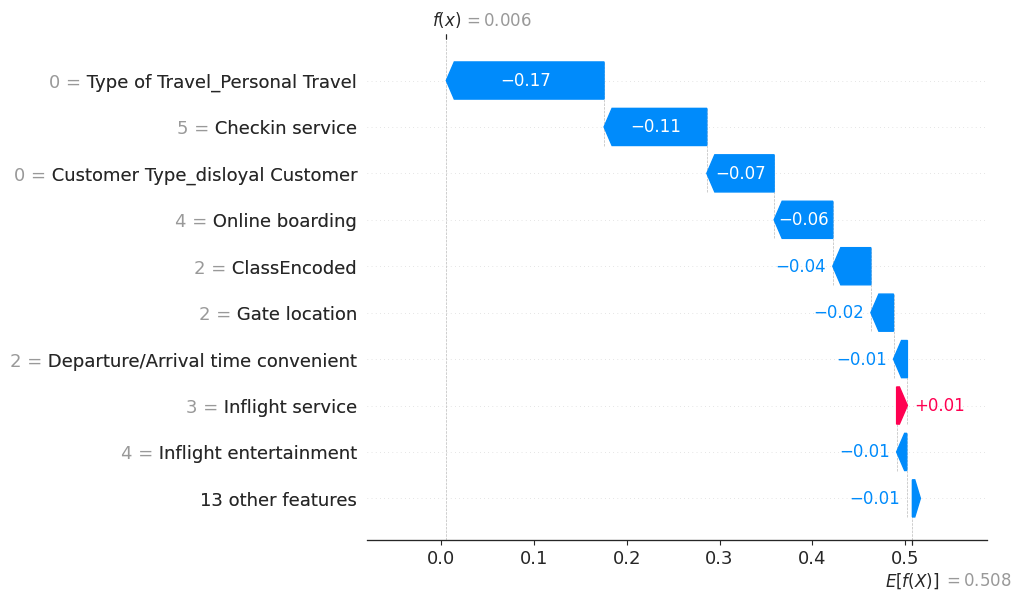

In [ ]:
shap.plots.waterfall(explanation[11])

## Feature Permutation

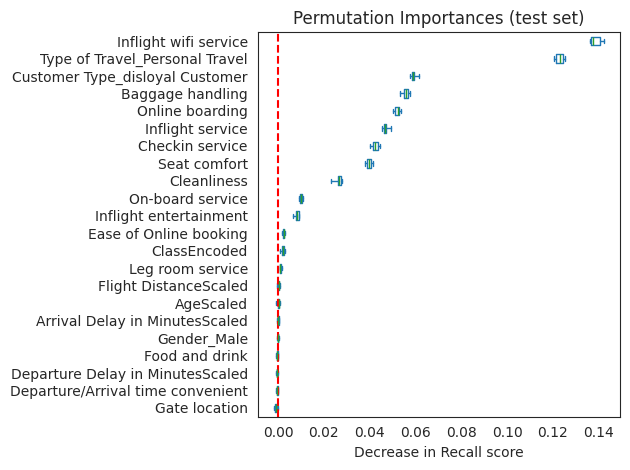

In [ ]:
result = permutation_importance(
  best_xgb,
  x_test,
  y_test,
  scoring='recall',
  n_repeats=10,
  random_state=11,
)

sorted_importances_idx = result.importances_mean.argsort()
df_importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=x_train.columns[sorted_importances_idx],
)
ax = df_importances.plot.box(vert=False, whis=10)
ax.set_title('Permutation Importances (test set)')
ax.axvline(x=0, color='red', linestyle='--')
ax.set_xlabel('Decrease in Recall score')
ax.figure.tight_layout()

,Metric,Value
0,Context used,predictions (y_pred)
1,Total passengers evaluated,25976
2,Satisfied count,0
3,Dissatisfied count,25976
4,Avg revenue / pax (IDR),3000000
5,Retention(satisfied),0.9
6,Retention(dissatisfied),0.7
7,Intervention success rate,0.4
8,Intervention cost / pax (IDR),200000
9,Baseline expected revenue (IDR),54549600000


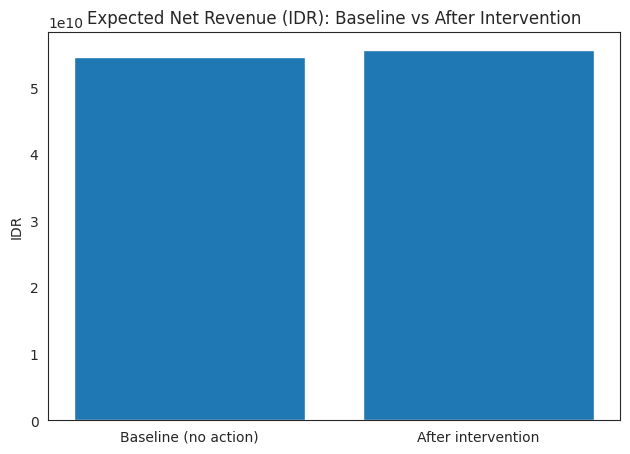

In [ ]:
# --- Business Impact Estimation (robust cell) ---
# Ubah angka-angka asumsi di bawah sesuai kebutuhan presentasi
avg_revenue_idr = 3_000_000           # pendapatan rata-rata per penumpang (IDR)
p_ret_satisfied = 0.90                # peluang kembali terbang jika satisfied
p_ret_dissatisfied = 0.70             # peluang kembali terbang jika dissatisfied (artinya 30% churn)
intervention_cost_per_person = 200_000
intervention_success_rate = 0.40      # bagian dissatisfied yang bisa "naik" retention-nya mendekati satisfied

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def normalize_bucket(x: str) -> str:
    s = str(x).strip().lower()
    # Kaggle dataset commonly uses 'satisfied' and 'neutral or dissatisfied'
    if "satisfied" in s and "neutral" not in s:
        return "satisfied"
    return "dissatisfied"

def choose_satisfaction_column(df: pd.DataFrame):
    cand = ["satisfaction", "Satisfaction", "satisfied", "Satisfied"]
    for c in df.columns:
        if c in cand:
            return c
    for c in df.columns:
        if "satisf" in c.lower():
            return c
    return None

# 1) Sumber data untuk hitung impact:
# Preferensi urutan:
#   a) Prediksi model (y_pred) bila ada
#   b) Kolom 'satisfaction' di dataframe (df / df_test / data asli)
counts = None
context_used = ""

try:
    # a) Coba pakai prediksi dari notebook
    #   - asumsi kelas positif: 'satisfied'
    #   - asumsi kelas negatif: 'neutral or dissatisfied' (atau 'dissatisfied')
    y_pred_series = None
    for name in ["y_pred", "yhat", "preds", "y_pred_labels"]:
        if name in globals():
            y_pred_series = pd.Series(globals()[name])
            break
    if y_pred_series is not None:
        # Normalisasi label prediksi ke dua bucket
        y_bucket = y_pred_series.map(normalize_bucket)
        n_sat = int((y_bucket == "satisfied").sum())
        n_dis = int((y_bucket == "dissatisfied").sum())
        counts = {"satisfied": n_sat, "dissatisfied": n_dis, "total": int(len(y_bucket))}
        context_used = "predictions (y_pred)"
except Exception as e:
    pass

if counts is None:
    # b) Cek dataframe umum yang sering dipakai di notebook Kaggle
    candidate_dfs = []
    for name in ["df", "data", "df_test", "test_df", "X_test"]:
        if name in globals():
            obj = globals()[name]
            if isinstance(obj, pd.DataFrame):
                candidate_dfs.append(obj)

    found = False
    for d in candidate_dfs:
        col = choose_satisfaction_column(d)
        if col is not None:
            bucket = d[col].map(normalize_bucket)
            n_sat = int((bucket == "satisfied").sum())
            n_dis = int((bucket == "dissatisfied").sum())
            counts = {"satisfied": n_sat, "dissatisfied": n_dis, "total": int(len(bucket))}
            context_used = f"dataframe '{[name for name in ['df','data','df_test','test_df','X_test'] if name in globals() and globals()[name] is d][0]}' column '{col}'"
            found = True
            break

    if not found:
        raise RuntimeError("Tidak menemukan variabel prediksi atau kolom kepuasan di dataframe. Harap jalankan sel modeling/EDA terlebih dahulu.")

# 2) Perhitungan baseline vs intervensi
n_sat = counts["satisfied"]
n_dis = counts["dissatisfied"]
n_total = counts["total"]

baseline_expected_revenue = (
    n_sat * avg_revenue_idr * p_ret_satisfied +
    n_dis * avg_revenue_idr * p_ret_dissatisfied
)

# Retention dissatisfied setelah intervensi sebagian berhasil
p_ret_after = p_ret_dissatisfied + intervention_success_rate * (p_ret_satisfied - p_ret_dissatisfied)

with_intervention_expected_revenue = (
    n_sat * avg_revenue_idr * p_ret_satisfied +
    n_dis * avg_revenue_idr * p_ret_after
)

intervention_cost = n_dis * intervention_cost_per_person
net_benefit = (with_intervention_expected_revenue - intervention_cost) - baseline_expected_revenue
roi = (net_benefit / intervention_cost) if intervention_cost > 0 else np.nan

summary = pd.DataFrame({
    "Metric": [
        "Context used",
        "Total passengers evaluated",
        "Satisfied count",
        "Dissatisfied count",
        "Avg revenue / pax (IDR)",
        "Retention(satisfied)",
        "Retention(dissatisfied)",
        "Intervention success rate",
        "Intervention cost / pax (IDR)",
        "Baseline expected revenue (IDR)",
        "With intervention expected revenue (IDR)",
        "Intervention total cost (IDR)",
        "Net benefit vs baseline (IDR)",
        "ROI (Net benefit / Cost)"
    ],
    "Value": [
        context_used,
        n_total,
        n_sat,
        n_dis,
        avg_revenue_idr,
        p_ret_satisfied,
        p_ret_dissatisfied,
        intervention_success_rate,
        intervention_cost_per_person,
        int(baseline_expected_revenue),
        int(with_intervention_expected_revenue),
        int(intervention_cost),
        int(net_benefit),
        None if np.isnan(roi) else float(round(roi, 3))
    ]
})

display(summary)

# 3) Visualisasi untuk slide
labels = ["Baseline (no action)", "After intervention"]
values = [baseline_expected_revenue, with_intervention_expected_revenue - intervention_cost]

plt.figure()
plt.bar(labels, values)
plt.title("Expected Net Revenue (IDR): Baseline vs After Intervention")
plt.ylabel("IDR")
plt.tight_layout()
plt.show()